# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [30]:
# 引用需要使用的函式庫
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

%matplotlib inline

In [31]:
# 載入 data
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
x = iris.data
y = iris.target

In [32]:
# 設定模型參數
estimators = [ ('k_means_3', KMeans(n_clusters=3)),
               ('k_means_5', KMeans(n_clusters=5)),
               ('k_means_8', KMeans(n_clusters=8)),
               ('k_means_bad_init', KMeans(n_clusters=5, n_init=1, init='random'))]

C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\ipykernel_launcher.py:57: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


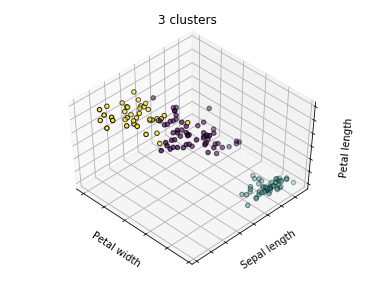

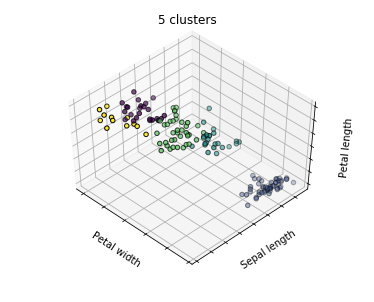

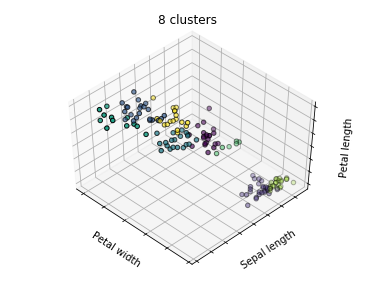

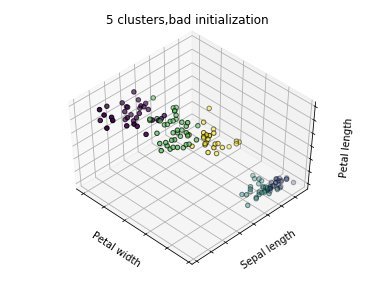

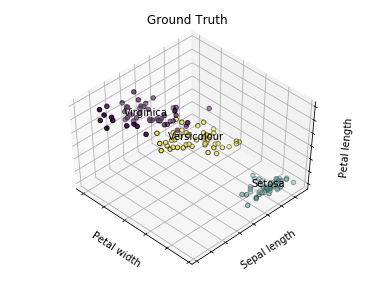

In [33]:
# 資料建模
fignum = 1
titles = ['3 clusters', '5 clusters', '8 clusters', '5 clusters,bad initialization']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(5, 4))
    
    # rect：用來指定座標軸在圖 fig 中的位置。[左邊座標,底部座標,寬度,高度]
    # elev：表示從哪個高度看。  azim：表示旋轉角度。
    ax = Axes3D(fig, rect=[0,0,1,1], elev=50, azim=135)
    
    # 資料擬合
    est.fit(x)
    labels = est.labels_
    
    ax.scatter( x[:, 3], x[:, 0], x[:, 2],
                c=labels.astype(np.float), edgecolor='k')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    
    ax.set_title(titles[fignum-1])
    ax.dist = 12
    fignum = fignum+1
    


# Plot the ground truth
fig = plt.figure(fignum, figsize=(5, 4))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=135)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(x[y == label, 3].mean(),
              x[y == label, 0].mean(),
              x[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()